<a href="https://colab.research.google.com/github/Nicolas-Noir/AA2-TUIA-2025/blob/main/Practica/AA2_lab3_b_25_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3b: Comparación de algoritmos de optimización.

Lab demostrativo de comparación de algoritmos de optimización.

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [ ]:
import os

REPO_NAME = "lab3"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



Cloning into 'lab3'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 23 (delta 10), reused 19 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 153.07 KiB | 8.50 MiB/s, done.
Resolving deltas: 100% (10/10), done.


Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

Establecer GPU por defecto en caso de estar disponible.

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

## Análisis Exploratorio.

Cargar y visualizar los datos.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Ejemplos de entrenamiento: (60000, 28, 28)
Ejemplos de test: (10000, 28, 28)


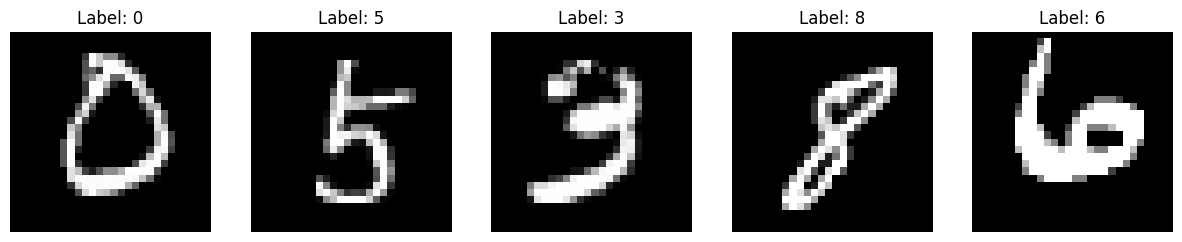

In [ ]:
# Cargamos MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizamos los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

print("Ejemplos de entrenamiento:", X_train.shape)
print("Ejemplos de test:", X_test.shape)

# Mostramos algunos ejemplos al azar:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    idx = np.random.randint(0, X_train.shape[0])
    axs[i].imshow(X_train[idx], cmap='gray')
    axs[i].set_title(f"Label: {y_train[idx]}")
    axs[i].axis('off')
plt.show()

## Entrenamiento

Definimos nuestro modelo usando tensorflow.

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Entrenamos el modelo utilizando distintos optimizadores.

In [ ]:
optimizers = ['sgd', 'rmsprop', 'adam']
histories = []

for optimizer in optimizers:
    print(f"Entrenando modelo con optimizador: {optimizer}")
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
    histories.append(history)

Entrenando modelo con optimizador: sgd
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7326 - loss: 1.0366 - val_accuracy: 0.9014 - val_loss: 0.3618
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8994 - loss: 0.3608 - val_accuracy: 0.9159 - val_loss: 0.2983
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9177 - loss: 0.3011 - val_accuracy: 0.9251 - val_loss: 0.2674
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9243 - loss: 0.2715 - val_accuracy: 0.9311 - val_loss: 0.2443
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9314 - loss: 0.2431 - val_accuracy: 0.9353 - val_loss: 0.2261
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9395 - loss: 0.2188 - val_accuracy: 0.9401 - val_loss: 0.2095
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9426 - loss: 0.2084 - val_accuracy: 0.9439 - val_loss: 0.1975
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3m

Plot del historial de métricas.

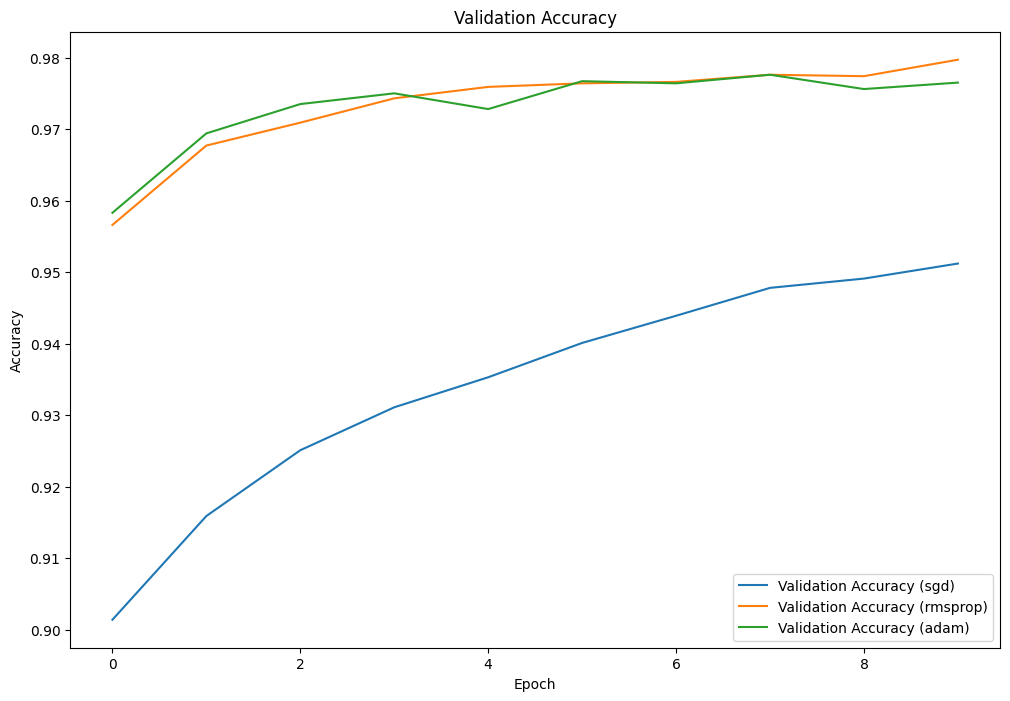

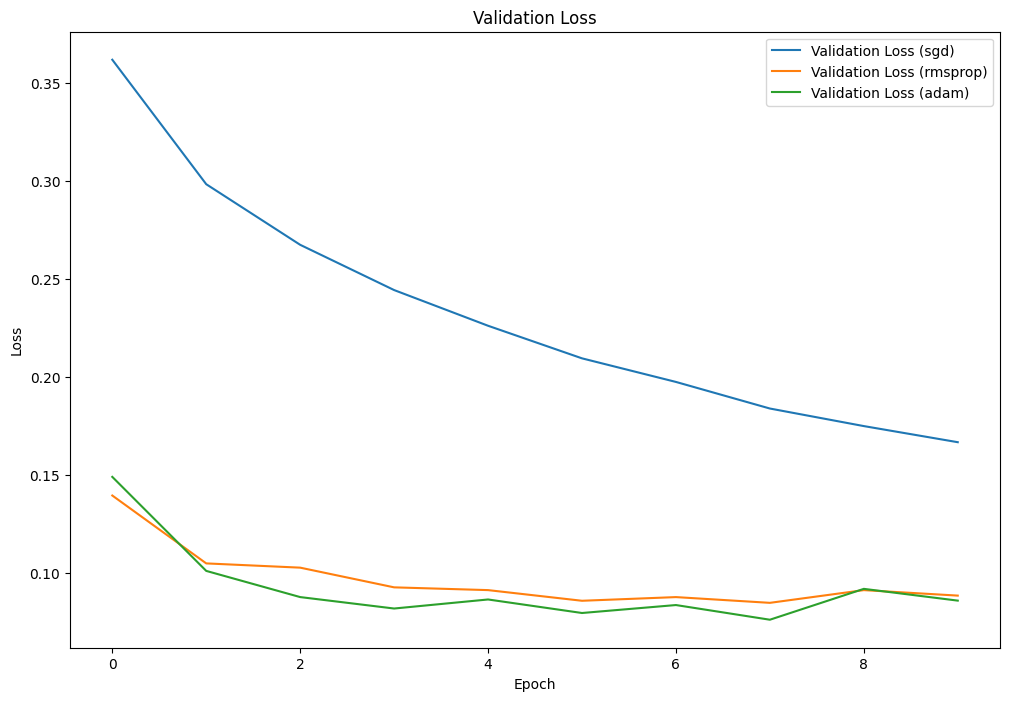

In [ ]:
# Accuracy
plt.figure(figsize=(12, 8))

for i, history in enumerate(histories):
    optimizer = optimizers[i]
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({optimizer})')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Loss
plt.figure(figsize=(12, 8))

for i, history in enumerate(histories):
    optimizer = optimizers[i]
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({optimizer})')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
